In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#importing data from the dataset
bank_details = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [3]:
bank_details

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = bank_details['Bankrupt?'].value_counts()
bankrupt_data

0    6599
1     220
Name: Bankrupt?, dtype: int64

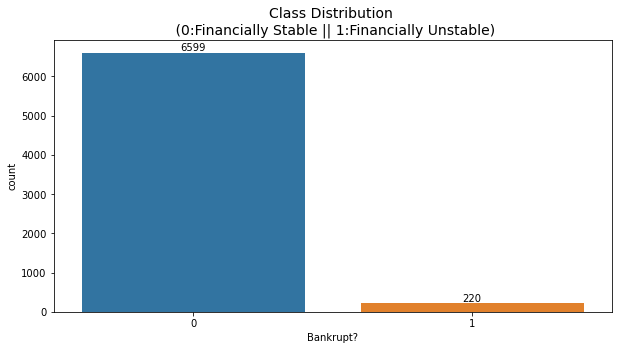

In [5]:
#Distribution representation
plt.figure(figsize = (10,5))
ax = sns.countplot(bank_details['Bankrupt?'])
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [6]:
labels = bank_details['Bankrupt?']
new_df = bank_details.drop(['Bankrupt?'], axis = 1)

In [7]:
new_df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [8]:
X_train, X_test, y_train, y_test = train_test_split(new_df, labels, test_size=0.3, random_state=42)

In [9]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
5632,0.500951,0.584169,0.553777,0.600614,0.600549,0.999025,0.797528,0.809438,0.303650,0.781627,...,0.820175,0.002280,0.625785,0.600611,0.841847,0.278811,0.026855,0.565445,1,0.033673
903,0.479647,0.523932,0.530007,0.609666,0.609666,0.998971,0.797330,0.809240,0.303417,0.781504,...,0.789320,0.001707,0.623430,0.609661,0.839409,0.281799,0.025910,0.539820,1,0.023831
2666,0.516502,0.580953,0.568714,0.610682,0.610682,0.999128,0.797571,0.809469,0.303510,0.781720,...,0.826516,0.000909,0.624479,0.610681,0.841642,0.275619,0.026792,0.565164,1,0.113503
109,0.446302,0.531509,0.499545,0.595771,0.595771,0.998895,0.797324,0.809286,0.303565,0.781420,...,0.794111,0.015785,0.623716,0.595770,0.839915,0.277858,0.026101,0.555682,1,0.040701
5316,0.501194,0.560565,0.547781,0.600001,0.600001,0.999034,0.797440,0.809349,0.303477,0.781613,...,0.811586,0.002546,0.624576,0.600001,0.841244,0.279156,0.026794,0.565173,1,0.031863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.542729,0.601123,0.583597,0.598236,0.598229,0.999014,0.797499,0.809394,0.303621,0.781659,...,0.836504,0.016145,0.624788,0.598231,0.842331,0.276206,0.026800,0.565198,1,0.073707
5191,0.550870,0.620148,0.610793,0.610422,0.610228,0.999101,0.797553,0.809468,0.303533,0.781738,...,0.843680,0.001074,0.624009,0.610419,0.843046,0.277142,0.026820,0.565293,1,0.049579
5226,0.507288,0.562200,0.556989,0.605529,0.605371,0.999033,0.797433,0.809354,0.303466,0.781615,...,0.813096,0.001194,0.623880,0.605529,0.841427,0.279716,0.026945,0.565800,1,0.029459
5390,0.581339,0.644407,0.633706,0.617247,0.617247,0.999129,0.797665,0.809550,0.303672,0.781826,...,0.855711,0.000806,0.623856,0.617243,0.843619,0.276696,0.026800,0.565200,1,0.058283


In [10]:
X_test

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
239,0.434456,0.481247,0.498742,0.596326,0.596326,0.998791,0.797012,0.809041,0.303237,0.781291,...,0.765336,0.001373,0.626305,0.596326,0.838369,0.275936,0.026791,0.565157,1,0.087378
2850,0.542534,0.571413,0.590663,0.603417,0.603417,0.999041,0.797476,0.809375,0.303526,0.781638,...,0.817797,0.001010,0.625384,0.603415,0.841846,0.279975,0.026904,0.565645,1,0.028519
2687,0.584897,0.631433,0.617057,0.610567,0.609954,0.999079,0.797542,0.809422,0.303560,0.781684,...,0.847518,0.001218,0.623886,0.610563,0.843304,0.277186,0.026792,0.565161,1,0.048876
6500,0.436942,0.490951,0.482413,0.607987,0.607951,0.998921,0.797265,0.809187,0.303408,0.781435,...,0.767650,0.000978,0.623608,0.607985,0.834479,0.296390,0.026615,0.564153,1,0.014691
2684,0.506898,0.565526,0.561754,0.608693,0.608693,0.999103,0.797538,0.809447,0.303503,0.781699,...,0.810394,0.003965,0.620144,0.608693,0.841780,0.285421,0.027121,0.566357,1,0.019245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.487739,0.561164,0.547727,0.608563,0.609024,0.999035,0.797432,0.809367,0.303460,0.781629,...,0.815063,0.000528,0.623923,0.608560,0.841348,0.277923,0.026822,0.565301,1,0.040098
2228,0.517720,0.570268,0.563092,0.601212,0.601212,0.999017,0.797527,0.809410,0.303664,0.781669,...,0.817142,0.003125,0.623963,0.601210,0.841758,0.279749,0.026853,0.565439,1,0.029334
1083,0.524204,0.569341,0.565716,0.610516,0.610523,0.999106,0.797563,0.809439,0.303542,0.781705,...,0.816698,0.001223,0.623751,0.610514,0.841456,0.277899,0.026840,0.565380,1,0.040314
3355,0.576074,0.640536,0.645859,0.618011,0.618011,0.999096,0.797526,0.809466,0.303498,0.781736,...,0.850828,0.001884,0.623782,0.618010,0.843830,0.278020,0.026797,0.565188,1,0.039229


In [11]:
y_train.value_counts()

0    4631
1     142
Name: Bankrupt?, dtype: int64

In [12]:
y_test.value_counts()

0    1968
1      78
Name: Bankrupt?, dtype: int64

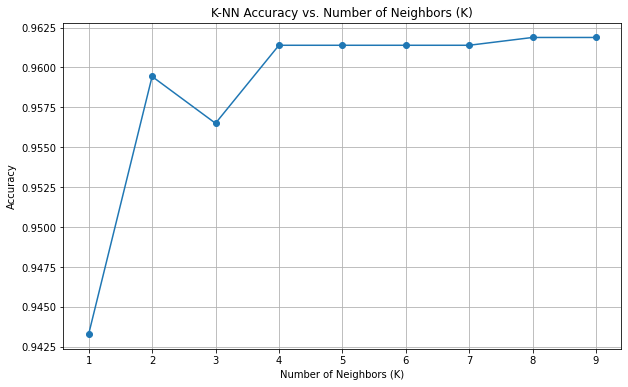

In [13]:
k_values = range(1, 10)

# Initialize lists to store accuracy scores for each K
accuracy_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [14]:
# Initialize the K-NN classifier with a chosen value of K
k = 8
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9618768328445748
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046



In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(conf_matrix)

Confusion matrix
[[1968    0]
 [  78    0]]


In [16]:
TN, FP, FN, TP = conf_matrix.ravel()

In [17]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

In [18]:
# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.96
Precision: nan
Recall: 0.00
F1 Score: nan


<H1>SMOTE 1</H1>

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [20]:
smote = SMOTE(sampling_strategy=1, random_state=42)

In [21]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [22]:
y_resampled.value_counts()

1    4631
0    4631
Name: Bankrupt?, dtype: int64

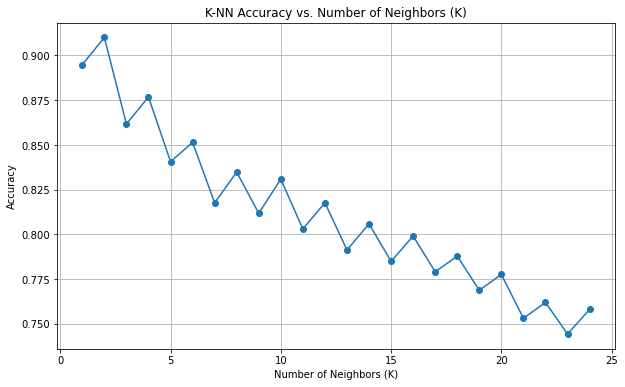

In [23]:
k_values = range(1, 25)

# Initialize lists to store accuracy scores for each K
accuracy_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled, y_resampled)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [24]:
# Initialize the K-NN classifier with a chosen value of K
k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8949169110459433
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1968
           1       0.08      0.18      0.12        78

    accuracy                           0.89      2046
   macro avg       0.53      0.55      0.53      2046
weighted avg       0.93      0.89      0.91      2046



In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(conf_matrix)

Confusion matrix
[[1817  151]
 [  64   14]]


<H1>SMOTE 0.5</H1>

In [26]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)

In [27]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [28]:
y_resampled.value_counts()

0    4631
1    2315
Name: Bankrupt?, dtype: int64

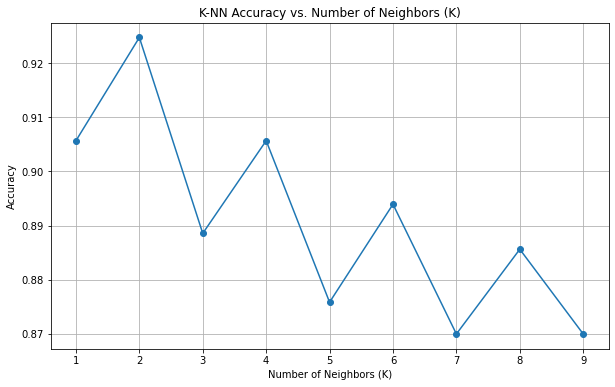

In [29]:
k_values = range(1, 10)

# Initialize lists to store accuracy scores for each K
accuracy_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled, y_resampled)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [30]:
# Initialize the K-NN classifier with a chosen value of K
k = 2
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9247311827956989
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1968
           1       0.12      0.15      0.13        78

    accuracy                           0.92      2046
   macro avg       0.54      0.55      0.55      2046
weighted avg       0.93      0.92      0.93      2046



In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(conf_matrix)

Confusion matrix
[[1880   88]
 [  66   12]]


<H1>SMOTE 0.25</H1>

In [32]:
smote = SMOTE(sampling_strategy=0.25, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
y_resampled.value_counts()

0    4631
1    1157
Name: Bankrupt?, dtype: int64

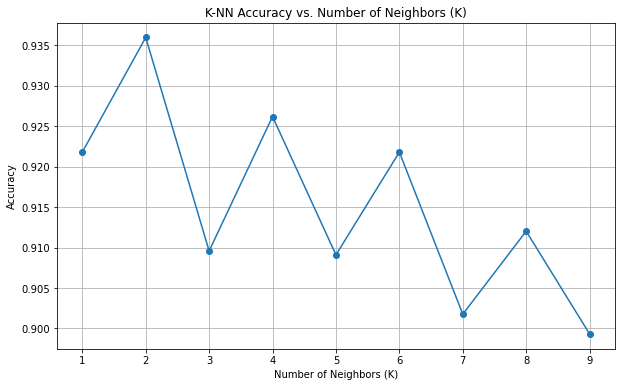

In [33]:
k_values = range(1, 10)

# Initialize lists to store accuracy scores for each K
accuracy_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled, y_resampled)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [34]:
# Initialize the K-NN classifier with a chosen value of K
k = 2
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9359726295210166
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1968
           1       0.13      0.12      0.12        78

    accuracy                           0.94      2046
   macro avg       0.55      0.54      0.54      2046
weighted avg       0.93      0.94      0.93      2046



In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(conf_matrix)

Confusion matrix
[[1906   62]
 [  69    9]]


<H1>ADASYN 1</H1>

In [36]:
from imblearn.over_sampling import ADASYN

In [37]:
adasyn = ADASYN(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [38]:
y_resampled.value_counts()

1    4690
0    4631
Name: Bankrupt?, dtype: int64

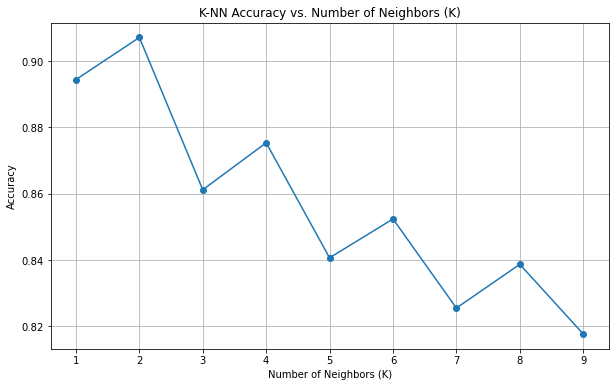

In [39]:
k_values = range(1, 10)

# Initialize lists to store accuracy scores for each K
accuracy_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled, y_resampled)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [40]:
# Initialize the K-NN classifier with a chosen value of K
k = 2
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9071358748778103
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1968
           1       0.09      0.17      0.12        78

    accuracy                           0.91      2046
   macro avg       0.53      0.55      0.54      2046
weighted avg       0.93      0.91      0.92      2046



In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(conf_matrix)

Confusion matrix
[[1843  125]
 [  65   13]]


<H1>ADASYN 0.5</H1>

In [42]:
adasyn = ADASYN(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [43]:
y_resampled.value_counts()

0    4631
1    2292
Name: Bankrupt?, dtype: int64

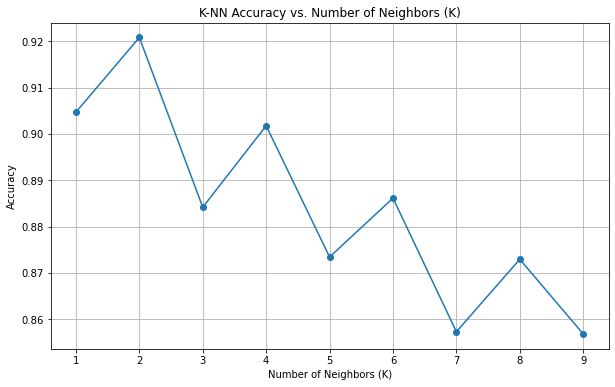

In [44]:
k_values = range(1, 10)

# Initialize lists to store accuracy scores for each K
accuracy_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled, y_resampled)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [45]:
# Initialize the K-NN classifier with a chosen value of K
k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9046920821114369
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1968
           1       0.09      0.17      0.12        78

    accuracy                           0.90      2046
   macro avg       0.53      0.55      0.53      2046
weighted avg       0.93      0.90      0.92      2046



In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(conf_matrix)

Confusion matrix
[[1838  130]
 [  65   13]]


<H1>Make Classification </H1>

In [47]:
n_samples = bank_details.shape[0]
n_features = bank_details.shape[1]

In [48]:
X_new, y_new = make_classification(n_samples=n_samples, n_features=n_features, n_classes=2)

In [49]:
num_records = X_new.shape[0]

In [50]:
print("Number of records in the dataset:", num_records)

Number of records in the dataset: 6819


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [52]:
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

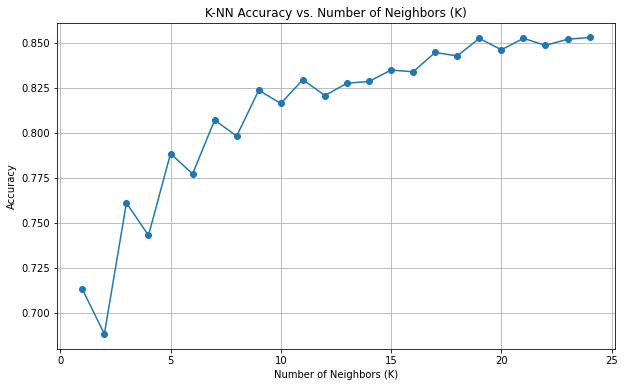

In [53]:
k_values = range(1, 25)

# Initialize lists to store accuracy scores for each K
accuracy_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [54]:
k = 21
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.852394916911046
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1024
           1       0.87      0.83      0.85      1022

    accuracy                           0.85      2046
   macro avg       0.85      0.85      0.85      2046
weighted avg       0.85      0.85      0.85      2046



In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(conf_matrix)

Confusion matrix
[[894 130]
 [172 850]]
